In [ ]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns #ibrary in Python predominantly used for making statistical graphics
import scipy as sp #pivot egineering
from datetime import timedelta

In [ ]:
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/data/NYPD_Hate_Crimes.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.isnull().sum()

Full Complaint ID                  0
Complaint Year Number              0
Month Number                       0
Record Create Date                 0
Complaint Precinct Code            0
Patrol Borough Name                0
County                             0
Law Code Category Description      0
Offense Description                0
PD Code Description                0
Bias Motive Description            0
Offense Category                   0
Arrest Date                      860
Arrest Id                        860
dtype: int64

In [ ]:
df.shape

(1296, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Full Complaint ID              1296 non-null   int64 
 1   Complaint Year Number          1296 non-null   int64 
 2   Month Number                   1296 non-null   int64 
 3   Record Create Date             1296 non-null   object
 4   Complaint Precinct Code        1296 non-null   int64 
 5   Patrol Borough Name            1296 non-null   object
 6   County                         1296 non-null   object
 7   Law Code Category Description  1296 non-null   object
 8   Offense Description            1296 non-null   object
 9   PD Code Description            1296 non-null   object
 10  Bias Motive Description        1296 non-null   object
 11  Offense Category               1296 non-null   object
 12  Arrest Date                    436 non-null    object
 13  Arr

In [ ]:
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

## Data Cleaning

In [ ]:
#Check all the county's listed in dataframe
df['County'].unique()

array(['BRONX', 'KINGS', 'NEW YORK', 'QUEENS', 'RICHMOND'], dtype=object)

In [ ]:
county = df['County'].value_counts()
county

NEW YORK    462
KINGS       441
QUEENS      235
BRONX       110
RICHMOND     48
Name: County, dtype: int64

In [ ]:
#Richmond County, more popularly known as Staten Island
#I never knew this and I am guessing others dont know either because of this I will rename the value Staten Island
#Also NEW YORK is vague because of this i will rename the county manhattan
#kings county will be renamed brooklyn

df['County'] = df['County'].replace(['NEW YORK'],'MANHATTAN')
df['County'] = df['County'].replace(['KINGS'],'BROOKLYN')
df['County'] = df['County'].replace(['RICHMOND'],'STATEN ISLAND')


In [ ]:
#Change null value for arrest date and arrest id to no arrest made

df['Arrest Date'] = df['Arrest Date'].fillna('No Arrest Made')
df['Arrest Id'] = df['Arrest Id'].fillna('No Arrest Made')


In [ ]:
df.isnull().sum()

Full Complaint ID                0
Complaint Year Number            0
Month Number                     0
Record Create Date               0
Complaint Precinct Code          0
Patrol Borough Name              0
County                           0
Law Code Category Description    0
Offense Description              0
PD Code Description              0
Bias Motive Description          0
Offense Category                 0
Arrest Date                      0
Arrest Id                        0
dtype: int64

In [ ]:
#CHECK TO SEE IF THE COUNTY WAS RENAMED

county_info = df['County'].value_counts()
county_info

MANHATTAN        462
BROOKLYN         441
QUEENS           235
BRONX            110
STATEN ISLAND     48
Name: County, dtype: int64

In [ ]:
df['Complaint Year Number'].unique()

#yay it has the 3 years I need!!!

array([2019, 2020, 2021])

In [ ]:
df['Offense Description'].unique()

array(['FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'RAPE', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &',
       'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY', 'CRIMINAL TRESPASS',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'DANGEROUS WEAPONS',
       'GRAND LARCENY', 'SEX CRIMES', 'HARRASSMENT 2',
       'INVESTIGATIONS/COMPLAINTS ONLY', 'FRAUDS', 'PETIT LARCENY'],
      dtype=object)

In [ ]:
#data cleaning of the offense description column

df['Offense Description'] = df['Offense Description'].replace(['MURDER & NON-NEGL. MANSLAUGHTE'],'Murder/Non-negligent Manslaughter')
df['Offense Description'] = df['Offense Description'].replace(['HARRASSMENT 2'],'HARRASSMENT')
df['Offense Description'] = df['Offense Description'].replace(['OFF. AGNST PUB ORD SENSBLTY &'],'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION')
df['Offense Description'] = df['Offense Description'].replace(['CRIMINAL MISCHIEF & RELATED OF'],'CRIMINAL MISCHIEF')

## IMPORT DATATIME FOR POTENTIAL USE


The Month Number colunmn seems to be usless, I can not see to many use cases for it because there is already a Record Created Data column that give the date the crime was reported.

because of this I will be using date time on the 'Record Created Column

In [ ]:
#item is listed as a string type

print(df['Record Create Date'][0])
print(type(df['Record Create Date'][0]))

02/08/2019
<class 'str'>


In [ ]:
#changed 'Record Create Date' column from an int datatype to a datetime value
#this will be good for furter exploration of the data

df['Record Create Date'] = pd.to_datetime(df['Record Create Date'], format="%m/%d/%Y", errors='coerce')
df['Record Create Date']

0      2019-02-08
1      2019-03-09
2      2019-03-08
3      2019-03-10
4      2019-05-11
          ...    
1291   2021-07-27
1292   2021-08-20
1293   2021-12-28
1294   2021-04-19
1295   2021-08-27
Name: Record Create Date, Length: 1296, dtype: datetime64[ns]

In [ ]:
df.info()

# shows "Record create date" dtype is now date-time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Full Complaint ID              1296 non-null   int64         
 1   Complaint Year Number          1296 non-null   int64         
 2   Month Number                   1296 non-null   int64         
 3   Record Create Date             1296 non-null   datetime64[ns]
 4   Complaint Precinct Code        1296 non-null   int64         
 5   Patrol Borough Name            1296 non-null   object        
 6   County                         1296 non-null   object        
 7   Law Code Category Description  1296 non-null   object        
 8   Offense Description            1296 non-null   object        
 9   PD Code Description            1296 non-null   object        
 10  Bias Motive Description        1296 non-null   object        
 11  Offense Category 

In [ ]:
print("printing original format of the data: ",df['Record Create Date'][0])
print("printing the month: ",df['Record Create Date'].dt.month[0])
print("printing the year: ",df['Record Create Date'].dt.year[0])
print("printing the weekday: ",df['Record Create Date'].dt.day_name()[0])

printing original format of the data:  2019-02-08 00:00:00
printing the month:  2
printing the year:  2019
printing the weekday:  Friday


### ToDO

check to see all the Bias motive decreption

make a seperate columns to check if True/False of Bias

withe this project we only care about

1.  ANTI-MALE HOMOSEXUAL (GAY)
2.  ANTI-WHITE
3.  ANTI-MUSLIM
4.  ANTI-HISPANIC
5.  ANTI-TRANSGENDER
6.  ANTI-ASIAN
7.  ANTI-BLACK
8.  ANTI-FEMALE HOMOSEXUAL (LESBIAN)
9. ANTI-LGBT (MIXED GROUP)


Part 2 

find the crimes commited in each year to compare if crime they went up or **down**

In [ ]:
Bias = df["Bias Motive Description"].unique()
Bias

array(['ANTI-MALE HOMOSEXUAL (GAY)', 'ANTI-WHITE', 'ANTI-MUSLIM',
       'ANTI-HISPANIC', 'ANTI-TRANSGENDER', 'ANTI-JEWISH', 'ANTI-ASIAN',
       'ANTI-BLACK', 'ANTI-FEMALE HOMOSEXUAL (LESBIAN)', 'ANTI-CATHOLIC',
       'ANTI-ARAB', 'ANTI-GENDER NON-CONFORMING', 'ANTI-FEMALE',
       'ANTI-LGBT (MIXED GROUP)', 'ANTI-MULTI-RACIAL GROUPS',
       'ANTI-OTHER ETHNICITY', '60 YRS AND OLDER', 'ANTI-HINDU',
       'ANTI-BUDDHIST', 'ANTI-JEHOVAHS WITNESS',
       'ANTI-PHYSICAL DISABILITY', 'ANTI-OTHER RELIGION',
       'ANTI-RELIGIOUS PRACTICE GENERALLY'], dtype=object)

In [ ]:
#using filter to return a booling value (True and false value) 
#for columns that contain the sub string 'ANTI-BLACK', ANTI-ASIAN and etc in it.

anti_black = df["Bias Motive Description"].str.contains('ANTI-BLACK')
anti_asian = df["Bias Motive Description"].str.contains('ANTI-ASIAN')
anti_gay_male = df["Bias Motive Description"].str.contains('ANTI-MALE HOMOSEXUAL (GAY)')
anti_white = df["Bias Motive Description"].str.contains('ANTI-WHITE')
anti_muslim = df["Bias Motive Description"].str.contains('ANTI-MUSLIM')
anti_hispanic = df["Bias Motive Description"].str.contains('ANTI-HISPANIC')
anti_transgender = df["Bias Motive Description"].str.contains('ANTI-TRANSGENDER')
anti_lesbian = df["Bias Motive Description"].str.contains('ANTI-FEMALE HOMOSEXUAL (LESBIAN)')
anti_lgbt_group = df["Bias Motive Description"].str.contains('ANTI-LGBT (MIXED GROUP)')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if sys.path[0] == '':


In [ ]:
#make columns that store values above

df['ANTI-BLACK']= anti_black
df["ANTI-ASIAN"]= anti_asian
df['ANTI-GAY-MALE'] = anti_gay_male
df['ANTI-WHITE'] = anti_white
df['ANTI-MUSLIM']= anti_muslim
df['ANTI-HISPANIC']= anti_hispanic
df['ANTI-TRANSGENDER']= anti_transgender
df['ANTI- LESBIAN'] = anti_lesbian
df['ANTI-LGBT-GROUP)'] = anti_lgbt_group


below I used .count() method to check the true or false in each column made.


The reasoning behind this is to get a better understanding of how many true bias's are there for each.



And which value is better to futher examine.

In [ ]:
df['ANTI-BLACK'].value_counts()


False    1182
True      114
Name: ANTI-BLACK, dtype: int64

In [ ]:
df['ANTI-ASIAN'].value_counts()

False    1118
True      178
Name: ANTI-ASIAN, dtype: int64

In [ ]:
df['ANTI-WHITE'].value_counts()

False    1240
True       56
Name: ANTI-WHITE, dtype: int64

In [ ]:
df['ANTI-MUSLIM'].value_counts()


False    1265
True       31
Name: ANTI-MUSLIM, dtype: int64

In [ ]:
df['ANTI-HISPANIC'].value_counts()


False    1277
True       19
Name: ANTI-HISPANIC, dtype: int64

In [ ]:
df['ANTI-TRANSGENDER'].value_counts()

False    1261
True       35
Name: ANTI-TRANSGENDER, dtype: int64

In [ ]:
df["ANTI- LESBIAN"].value_counts()

False    1296
Name: ANTI- LESBIAN, dtype: int64

In [ ]:
df['ANTI-LGBT-GROUP)'].value_counts()

False    1296
Name: ANTI-LGBT-GROUP), dtype: int64

In [ ]:
df['ANTI-GAY-MALE'].value_counts()

False    1296
Name: ANTI-GAY-MALE, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Full Complaint ID              1296 non-null   int64         
 1   Complaint Year Number          1296 non-null   int64         
 2   Month Number                   1296 non-null   int64         
 3   Record Create Date             1296 non-null   datetime64[ns]
 4   Complaint Precinct Code        1296 non-null   int64         
 5   Patrol Borough Name            1296 non-null   object        
 6   County                         1296 non-null   object        
 7   Law Code Category Description  1296 non-null   object        
 8   Offense Description            1296 non-null   object        
 9   PD Code Description            1296 non-null   object        
 10  Bias Motive Description        1296 non-null   object        
 11  Offense Category 

In [ ]:
df.corr(method ='pearson')

,Full Complaint ID,Complaint Year Number,Month Number,Complaint Precinct Code,ANTI-BLACK,ANTI-ASIAN,ANTI-GAY-MALE,ANTI-WHITE,ANTI-MUSLIM,ANTI-HISPANIC,ANTI-TRANSGENDER,ANTI- LESBIAN,ANTI-LGBT-GROUP)
Full Complaint ID,1.000000,0.999078,-0.002173,-0.034077,-0.015638,0.318003,NaN,-0.067503,-0.036403,-0.011780,0.013291,NaN,NaN
Complaint Year Number,0.999078,1.000000,-0.002345,-0.076956,-0.019773,0.323366,NaN,-0.065188,-0.039197,-0.012635,0.009820,NaN,NaN
Month Number,-0.002173,-0.002345,1.000000,0.004071,-0.009870,-0.155589,NaN,0.014143,0.024001,0.037220,-0.005696,NaN,NaN
Complaint Precinct Code,-0.034077,-0.076956,0.004071,1.000000,0.097108,-0.142497,NaN,-0.050142,0.067050,0.020573,0.080068,NaN,NaN
ANTI-BLACK,-0.015638,-0.019773,-0.009870,0.097108,1.000000,-0.123918,NaN,-0.065997,-0.048616,-0.037881,-0.051739,NaN,NaN
ANTI-ASIAN,0.318003,0.323366,-0.155589,-0.142497,-0.123918,1.000000,NaN,-0.084795,-0.062463,-0.048671,-0.066476,NaN,NaN
ANTI-GAY-MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANTI-WHITE,-0.067503,-0.065188,0.014143,-0.050142,-0.065997,-0.084795,NaN,1.000000,-0.033267,-0.025922,-0.035405,NaN,NaN
ANTI-MUSLIM,-0.036403,-0.039197,0.024001,0.067050,-0.048616,-0.062463,NaN,-0.033267,1.000000,-0.019095,-0.026080,NaN,NaN
ANTI-HISPANIC,-0.011780,-0.012635,0.037220,0.020573,-0.037881,-0.048671,NaN,-0.025922,-0.019095,1.000000,-0.020322,NaN,NaN


In [ ]:
df['Offense Description'].unique()

array(['FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'RAPE', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
       'CRIMINAL MISCHIEF', 'BURGLARY', 'CRIMINAL TRESPASS',
       'Murder/Non-negligent Manslaughter', 'DANGEROUS WEAPONS',
       'GRAND LARCENY', 'SEX CRIMES', 'HARRASSMENT',
       'INVESTIGATIONS/COMPLAINTS ONLY', 'FRAUDS', 'PETIT LARCENY'],
      dtype=object)

In [ ]:
#making a sub dataframe for all values in selected columns with boolean statement is true

asian = df.loc[df['ANTI-ASIAN'] == True]
black = df.loc[df['ANTI-BLACK'] == True]
white = df.loc[df['ANTI-WHITE'] == True]
muslim = df.loc[df["ANTI-MUSLIM"] == True]
hispanic = df.loc[df['ANTI-HISPANIC'] == True]
trans = df.loc[df['ANTI-TRANSGENDER'] == True]

In [ ]:
asian_2019 = asian.loc[asian['Complaint Year Number'] == 2019]
asian_2020 = asian.loc[asian['Complaint Year Number'] == 2020]
asian_2021 = asian.loc[asian['Complaint Year Number'] == 2021]

black_2019 = black.loc[black['Complaint Year Number'] == 2019]
black_2020 = black.loc[black['Complaint Year Number'] == 2020]
black_2021 = black.loc[black['Complaint Year Number'] == 2021]

white_2019 = white.loc[white['Complaint Year Number'] == 2019]
white_2020 = white.loc[white['Complaint Year Number'] == 2020]
white_2021 = white.loc[white['Complaint Year Number'] == 2021]

muslim_2019 = muslim.loc[muslim['Complaint Year Number'] == 2019]
muslim_2020 = muslim.loc[muslim['Complaint Year Number'] == 2020]
muslim_2021 = muslim.loc[muslim['Complaint Year Number'] == 2021]

hispanic_2019 = hispanic.loc[hispanic['Complaint Year Number'] == 2019]
hispanic_2020 = hispanic.loc[hispanic['Complaint Year Number'] == 2020]
hispanic_2021 = hispanic.loc[hispanic['Complaint Year Number'] == 2021]

trans_2019 = trans.loc[trans['Complaint Year Number'] == 2019]
trans_2020 = trans.loc[trans['Complaint Year Number'] == 2020]
trans_2021 = trans.loc[trans['Complaint Year Number'] == 2021]



In [ ]:
asian.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,...,Arrest Id,ANTI-BLACK,ANTI-ASIAN,ANTI-GAY-MALE,ANTI-WHITE,ANTI-MUSLIM,ANTI-HISPANIC,ANTI-TRANSGENDER,ANTI- LESBIAN,ANTI-LGBT-GROUP)
14,202004412397317,2020,3,2020-03-28,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",...,B32682489,False,True,False,False,False,False,False,False,False
15,202004412397317,2020,3,2020-03-28,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",...,B32682490,False,True,False,False,False,False,False,False,False
16,202004412397317,2020,3,2020-03-28,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",...,B32682492,False,True,False,False,False,False,False,False,False
20,202004012846517,2020,7,2020-07-31,40,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,...,B32692369,False,True,False,False,False,False,False,False,False
22,202004412397317,2020,3,2020-03-28,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",...,B32700799,False,True,False,False,False,False,False,False,False


In [ ]:
black_2019.shape

(37, 23)

In [ ]:
black_2021.shape

(41, 23)

In [ ]:
asian_2019.shape

(1, 23)

In [ ]:
asian_2020.shape

(33, 23)

In [ ]:
asian_2021.shape

(144, 23)

In [ ]:
trans_2019.shape

(13, 23)

In [ ]:
trans_2020.shape

(4, 23)

In [ ]:
trans_2021.shape

(18, 23)

In [ ]:
white_2019.shape

(28, 23)

In [ ]:
white_2020.shape

(10, 23)

In [ ]:
white_2021.shape

(18, 23)

In [ ]:
hispanic_2019.shape

(9, 23)

In [ ]:
hispanic_2020.shape

(1, 23)

In [ ]:
#import pandas as pd
#df = pd.read_json('https://data.cityofnewyork.us/resource/bqiq-cu78.json')
#biases_of_interest = ['ANTI-BLACK','ANTI-ASIAN', 'ANTI-GAY-MALE']
#df_2 = df[df['bias_motive_description'].isin(biases_of_interest)]
#df_2'''

## EDA'

PLOT WHAT CRIMES Offense Description &	PD Code Description	was more potent for each race (bar)

1. asian
2. black

4. white


plot a chart to see where each crime was commited the most in each year using pie

In [ ]:
asian_2019.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id', 'ANTI-BLACK', 'ANTI-ASIAN', 'ANTI-GAY-MALE',
       'ANTI-WHITE', 'ANTI-MUSLIM', 'ANTI-HISPANIC', 'ANTI-TRANSGENDER',
       'ANTI- LESBIAN', 'ANTI-LGBT-GROUP)'],
      dtype='object')

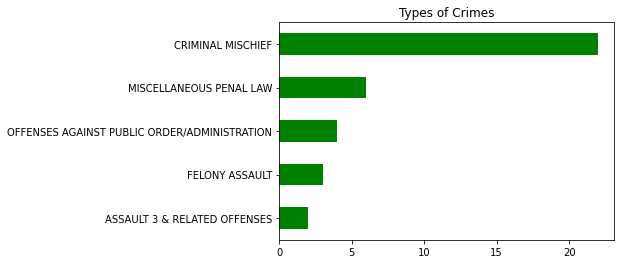

In [ ]:
#types of crimes

black_2019['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

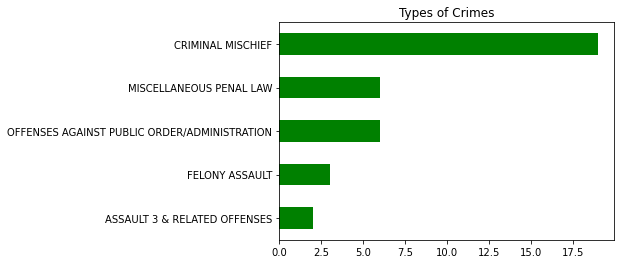

In [ ]:
#types of crimes
black_2020['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

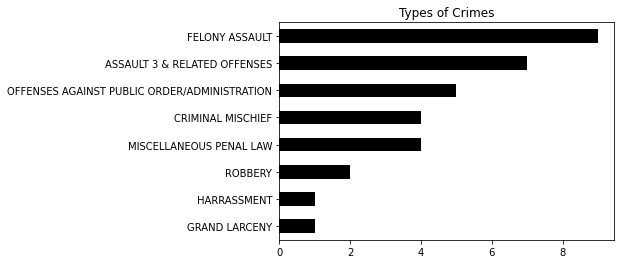

In [ ]:
#Types of Crime
asian_2020['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'black' , title = "Types of Crimes")

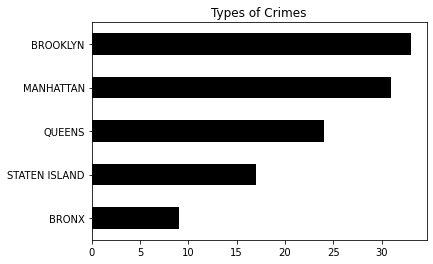

In [ ]:
#Types of Crime

black['County'].value_counts().sort_values().plot(kind="barh", color = 'black' , title = "Types of Crimes")

In [ ]:
black['County'].value_counts().sort_values()

BRONX             9
STATEN ISLAND    17
QUEENS           24
MANHATTAN        31
BROOKLYN         33
Name: County, dtype: int64

In [ ]:
black_2020['County'].value_counts().sort_values()

BRONX             3
STATEN ISLAND     6
BROOKLYN          6
MANHATTAN        10
QUEENS           11
Name: County, dtype: int64

In [ ]:
black_2021['County'].value_counts().sort_values()

BRONX             3
QUEENS            7
MANHATTAN         8
STATEN ISLAND     8
BROOKLYN         15
Name: County, dtype: int64

In [ ]:
black_2019['County'].value_counts().sort_values()

BRONX             3
STATEN ISLAND     3
QUEENS            6
BROOKLYN         12
MANHATTAN        13
Name: County, dtype: int64

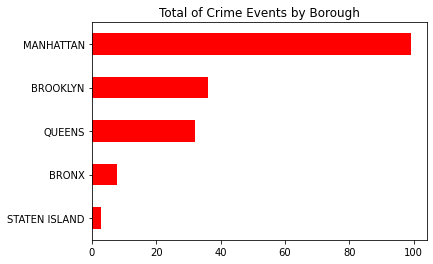

In [ ]:
#county
asian['County'].value_counts().sort_values().plot(kind="barh", color = 'red', title = 'Total of Crime Events by Borough')


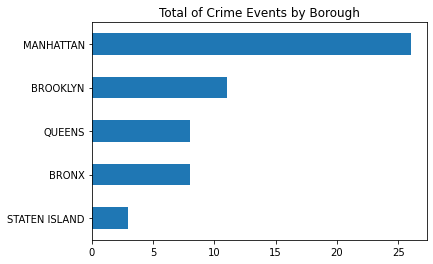

In [ ]:
#county
white['County'].value_counts().sort_values().plot(kind="barh",  title = 'Total of Crime Events by Borough')


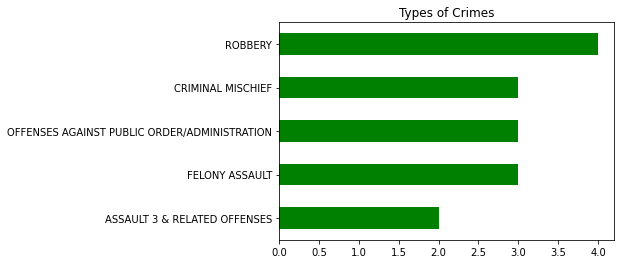

In [ ]:
#types of crimes
muslim_2019['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

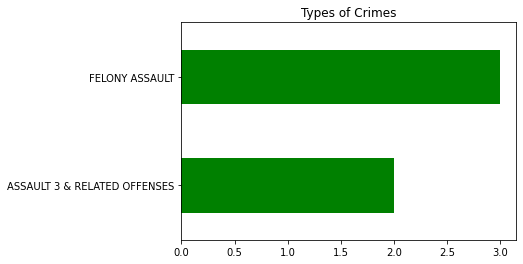

In [ ]:
#types of crimes
muslim_2020['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

In [ ]:
muslim_2020['Offense Description'].value_counts()

FELONY ASSAULT                  3
ASSAULT 3 & RELATED OFFENSES    2
Name: Offense Description, dtype: int64

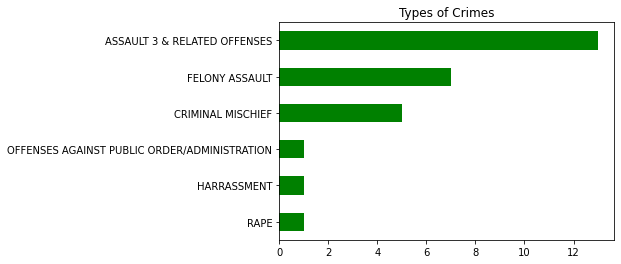

In [ ]:
#types of crimes

white_2019['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

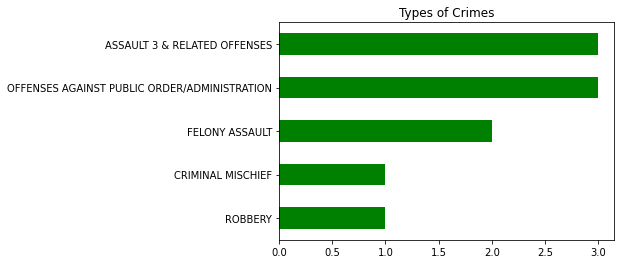

In [ ]:
#types of crimes

white_2020['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

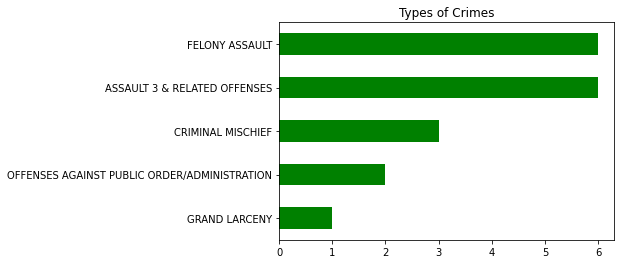

In [ ]:
#types of crimes

white_2021['Offense Description'].value_counts().sort_values().plot(kind="barh", color = 'green' , title = "Types of Crimes")

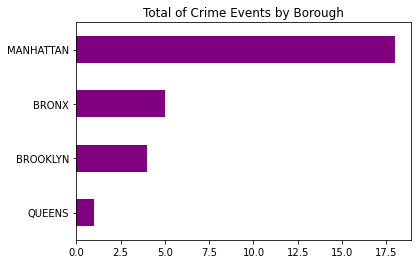

In [ ]:
#county
white_2019['County'].value_counts().sort_values().plot(kind="barh", color = 'purple', title = 'Total of Crime Events by Borough')

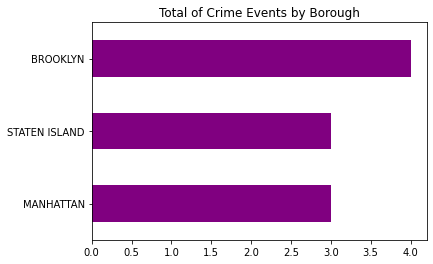

In [ ]:
#county
white_2020['County'].value_counts().sort_values().plot(kind="barh", color = 'purple', title = 'Total of Crime Events by Borough')

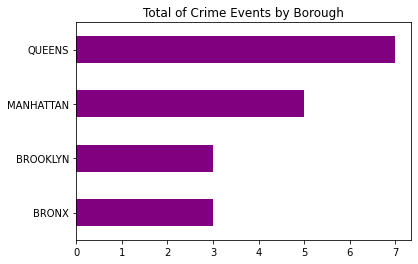

In [ ]:
#county
white_2021['County'].value_counts().sort_values().plot(kind="barh", color = 'purple', title = 'Total of Crime Events by Borough')

In [ ]:
df['Offense Description'].unique()

array(['FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'RAPE', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
       'CRIMINAL MISCHIEF', 'BURGLARY', 'CRIMINAL TRESPASS',
       'Murder/Non-negligent Manslaughter', 'DANGEROUS WEAPONS',
       'GRAND LARCENY', 'SEX CRIMES', 'HARRASSMENT',
       'INVESTIGATIONS/COMPLAINTS ONLY', 'FRAUDS', 'PETIT LARCENY'],
      dtype=object)

In [ ]:
labels = df["Offense Description"].unique()

In [ ]:
labels

array(['FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'RAPE', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
       'CRIMINAL MISCHIEF', 'BURGLARY', 'CRIMINAL TRESPASS',
       'Murder/Non-negligent Manslaughter', 'DANGEROUS WEAPONS',
       'GRAND LARCENY', 'SEX CRIMES', 'HARRASSMENT',
       'INVESTIGATIONS/COMPLAINTS ONLY', 'FRAUDS', 'PETIT LARCENY'],
      dtype=object)

In [ ]:
asian_crime_2019 = asian_2019["Offense Description"].value_counts()
asian_crime_2020 = asian_2020["Offense Description"].value_counts()
asian_crime_2021 = asian_2021["Offense Description"].value_counts()


white_crime_2019 = white_2019["Offense Description"].value_counts()
white_crime_2020 = white_2020["Offense Description"].value_counts()
white_crime_2021 = white_2021["Offense Description"].value_counts()

african_american_crime_2019 = black_2019["Offense Description"].value_counts()
african_american_crime_2020 = black_2020["Offense Description"].value_counts()
african_american_crime_2021 = black_2021["Offense Description"].value_counts()



In [ ]:
trans_crime_2019 = trans_2019["Offense Description"].value_counts()
trans_crime_2020 = trans_2020["Offense Description"].value_counts()
trans_crime_2021 = trans_2021["Offense Description"].value_counts()

Forloop that add 0 for any value in "Offense Description" that is not in data.

to avoid syntax error


In [ ]:
for crime in labels:
    if crime in african_american_crime_2019.index:
        pass
    else:
        african_american_crime_2019[crime] = 0

In [ ]:
for crime in labels:
    if crime in african_american_crime_2020.index:
        pass
    else:
        african_american_crime_2020[crime] = 0

In [ ]:
for crime in labels:
    if crime in african_american_crime_2021.index:
        pass
    else:
        african_american_crime_2021[crime] = 0

In [ ]:
for crime in labels:
    if crime in white_crime_2019.index:
        pass
    else:
        white_crime_2019[crime] = 0

In [ ]:
for crime in labels:
    if crime in white_crime_2020.index:
        pass
    else:
        white_crime_2020[crime] = 0

In [ ]:
for crime in labels:
    if crime in white_crime_2021.index:
        pass
    else:
        white_crime_2021[crime] = 0

In [ ]:
for crime in labels:
    if crime in asian_crime_2019.index:
        pass
    else:
        asian_crime_2019[crime] = 0

In [ ]:
for crime in labels:
    if crime in asian_crime_2020.index:
        pass
    else:
        asian_crime_2020[crime] = 0

In [ ]:
for crime in labels:
    if crime in asian_crime_2021.index:
        pass
    else:
        asian_crime_2021[crime] = 0

In [ ]:
for crime in labels:
    if crime in trans_crime_2019.index:
        pass
    else:
        trans_crime_2019[crime] = 0

In [ ]:
for crime in labels:
    if crime in trans_crime_2020.index:
        pass
    else:
        asian_crime_2020[crime] = 0

In [ ]:
for crime in labels:
    if crime in trans_crime_2021.index:
        pass
    else:
        trans_crime_2021[crime] = 0

In [ ]:
asian_crime_2019

Murder/Non-negligent Manslaughter               1
FELONY ASSAULT                                  0
ASSAULT 3 & RELATED OFFENSES                    0
ROBBERY                                         0
RAPE                                            0
MISCELLANEOUS PENAL LAW                         0
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION    0
CRIMINAL MISCHIEF                               0
BURGLARY                                        0
CRIMINAL TRESPASS                               0
DANGEROUS WEAPONS                               0
GRAND LARCENY                                   0
SEX CRIMES                                      0
HARRASSMENT                                     0
INVESTIGATIONS/COMPLAINTS ONLY                  0
FRAUDS                                          0
PETIT LARCENY                                   0
Name: Offense Description, dtype: int64

Need to find a way chart all five groups in one graph

need to make a pie graph of 'Complaint Year Number' comparing 2019 - 2021 complaints

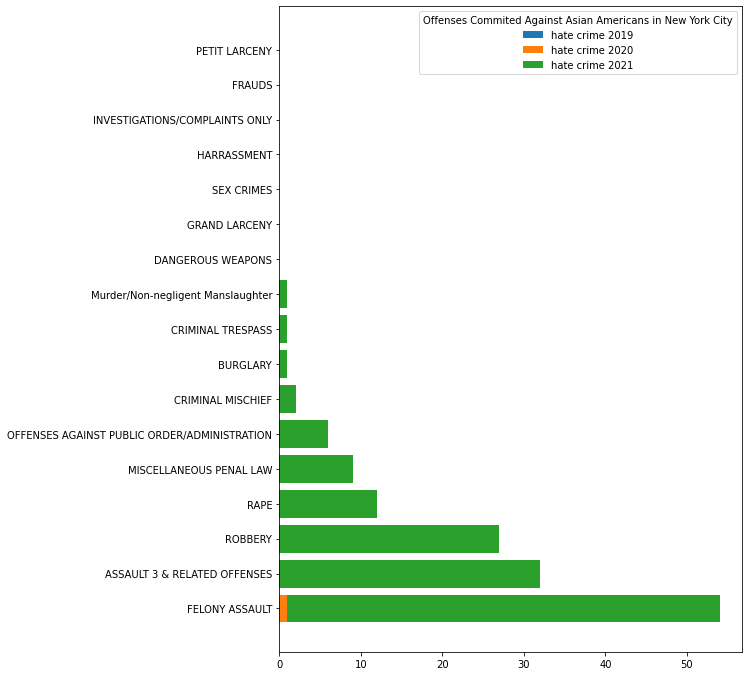

In [ ]:
plt.rcParams["figure.figsize"] = [10.50, 9.50]
plt.rcParams["figure.autolayout"] = True

b1 = plt.barh(labels, asian_crime_2019)

b2 = plt.barh(labels, asian_crime_2020)

b3 = plt.barh(labels, asian_crime_2021, left=asian_crime_2019)


plt.legend([b1, b2, b3], ["hate crime 2019", "hate crime 2020", "hate crime 2021" ], title="Offenses Commited Against Asian Americans in New York City", loc="upper right")

plt.show()


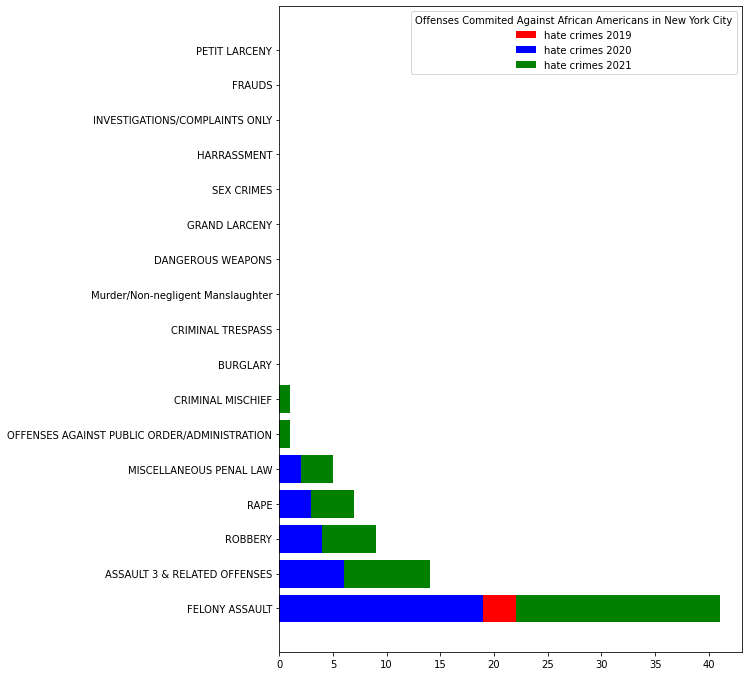

In [ ]:
plt.rcParams["figure.figsize"] = [10.50, 9.50]
plt.rcParams["figure.autolayout"] = True

c1 = plt.barh(labels, african_american_crime_2019, color="red")

c2 = plt.barh(labels, african_american_crime_2020,  color="blue")

c3 = plt.barh(labels, african_american_crime_2021, left=african_american_crime_2019, color="green")


plt.legend([c1, c2, c3], ["hate crimes 2019", "hate crimes 2020", "hate crimes 2021" ], title="Offenses Commited Against African Americans in New York City", loc="upper right")

plt.show()

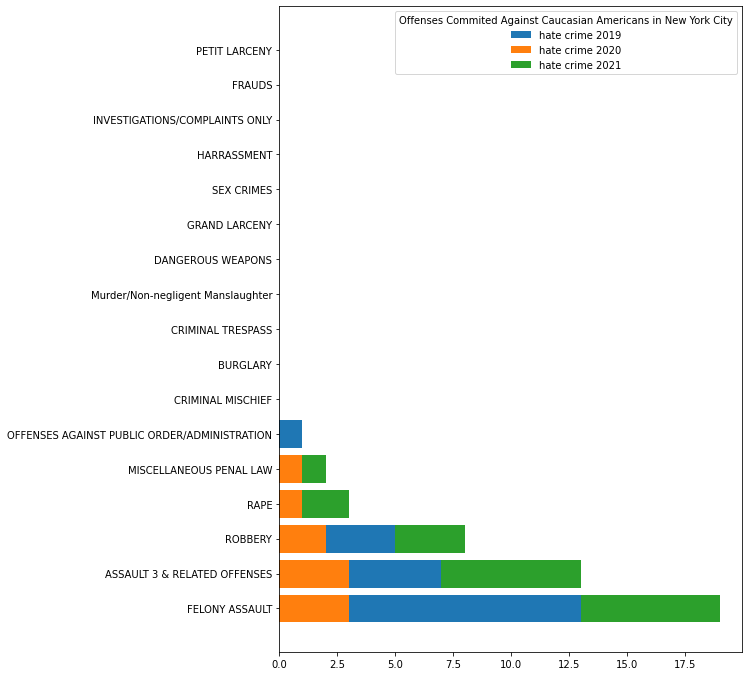

In [ ]:
plt.rcParams["figure.figsize"] = [10.50, 9.50]
plt.rcParams["figure.autolayout"] = True

d1 = plt.barh(labels, white_crime_2019)

d2 = plt.barh(labels, white_crime_2020)

d3 = plt.barh(labels, white_crime_2021, left=white_crime_2019)


plt.legend([d1, d2, d3], ["hate crime 2019", "hate crime 2020", "hate crime 2021" ], title="Offenses Commited Against Caucasian Americans in New York City", loc="upper right")

plt.show()

In [ ]:
#find value counts and sort to see how to put the order of label in pie chart below
df['County'].value_counts().sort_values()

STATEN ISLAND     48
BRONX            110
QUEENS           235
BROOKLYN         441
MANHATTAN        462
Name: County, dtype: int64

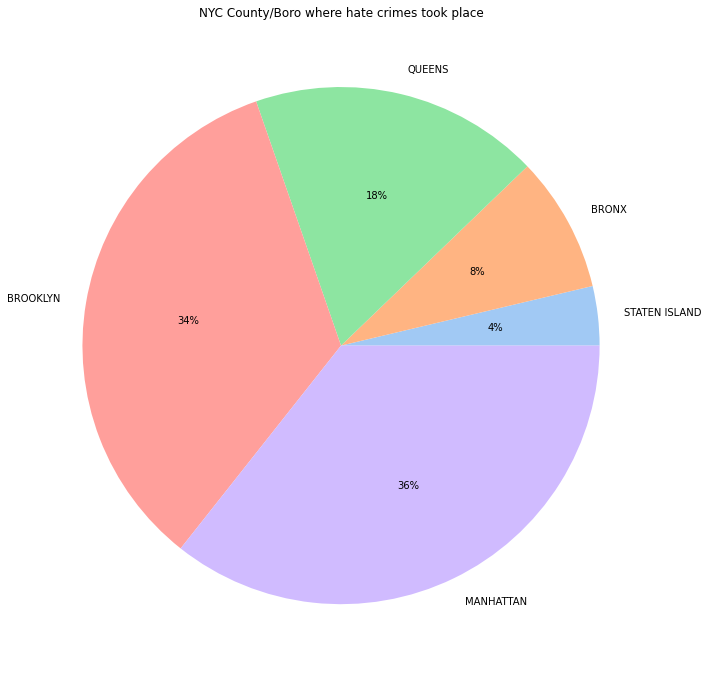

In [ ]:
#County/Boro where crimes took place

#define data
data = df['County'].value_counts().sort_values()
labels = ['STATEN ISLAND','BRONX', 'QUEENS', 'BROOKLYN', 'MANHATTAN']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("NYC County/Boro where hate crimes took place")

plt.show()


In [ ]:
df['Complaint Year Number'].value_counts().sort_values()

2020    284
2019    447
2021    565
Name: Complaint Year Number, dtype: int64

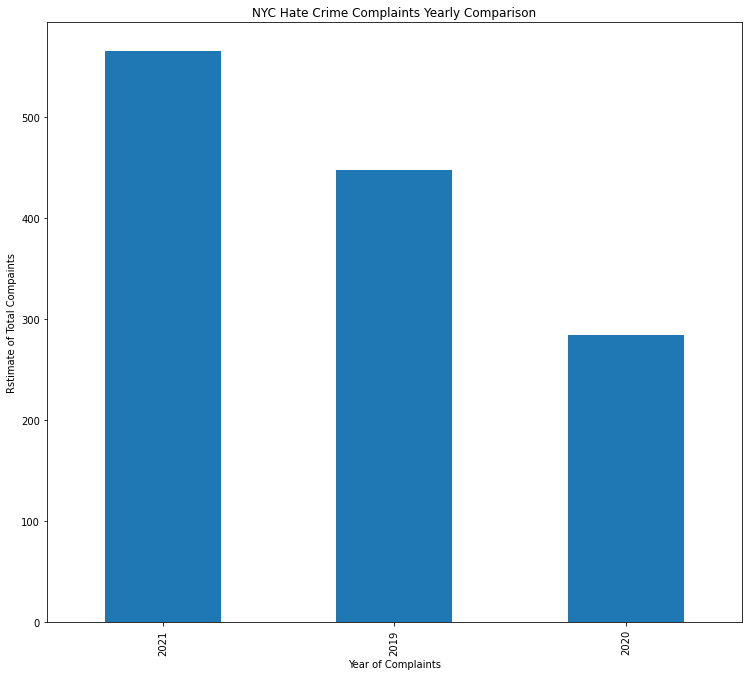

In [ ]:
df['Complaint Year Number'].value_counts().plot(kind='bar')
plt.ylabel("Rstimate of Total Compaints" )
plt.xlabel('Year of Complaints')
plt.title("NYC Hate Crime Complaints Yearly Comparison")

plt.show()

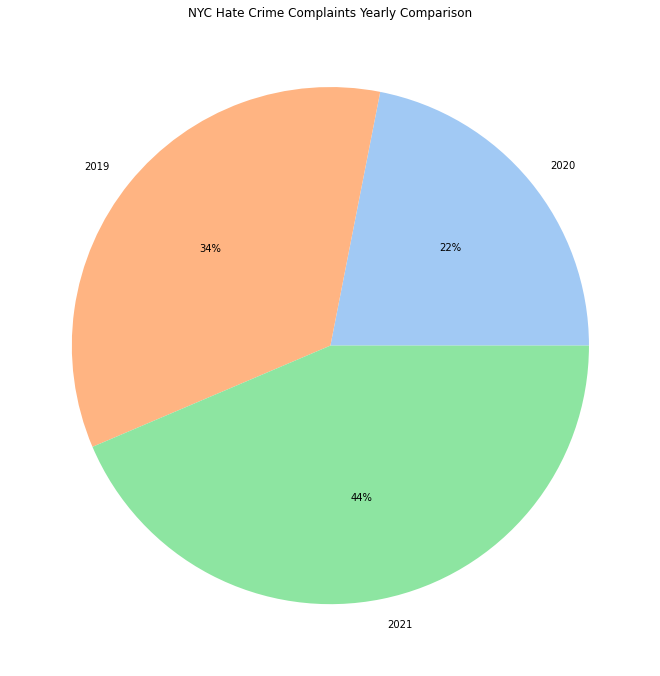

In [ ]:
#define data
data = df['Complaint Year Number'].value_counts().sort_values()
labels = ['2020','2019','2021']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("NYC Hate Crime Complaints Yearly Comparison")

plt.show()


In [ ]:
df['Offense Description'].value_counts().sort_values()

FRAUDS                                            1
RAPE                                              1
INVESTIGATIONS/COMPLAINTS ONLY                    1
PETIT LARCENY                                     2
DANGEROUS WEAPONS                                 2
CRIMINAL TRESPASS                                 2
SEX CRIMES                                        3
Murder/Non-negligent Manslaughter                 4
BURGLARY                                          6
HARRASSMENT                                      14
GRAND LARCENY                                    20
ROBBERY                                          38
FELONY ASSAULT                                  148
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION    164
ASSAULT 3 & RELATED OFFENSES                    232
MISCELLANEOUS PENAL LAW                         327
CRIMINAL MISCHIEF                               331
Name: Offense Description, dtype: int64